<a href="https://colab.research.google.com/github/OttmarIvey/Analisis-de-Agrupamiento/blob/main/Segmentacion_de_Especies_con_Analisis_de_Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación usaremos el data set llamado La flor de Iris para analizar sus propiedades tales como: Longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Usaremos el análisis de agrupamiento para esto.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Carguemos el dataset

In [2]:
data = pd.read_csv('iris-dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Ahora graficaremos los datos tal como estan para compararlo con los resultados del analisis de agrupamiento. Para esto usaremos el largo del sepalo y el ancho del sepalo como variables

Text(0, 0.5, 'Ancho del sepalo')

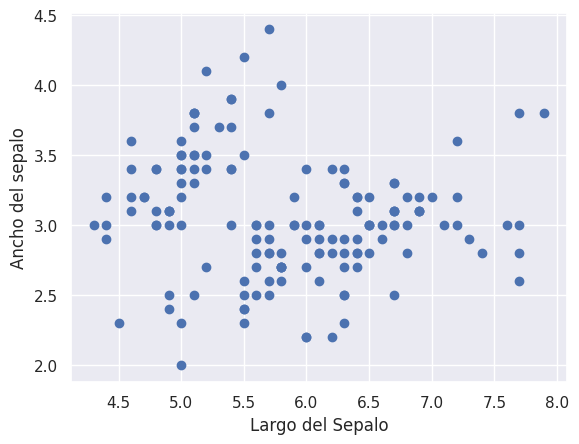

In [4]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Largo del Sepalo')
plt.ylabel('Ancho del sepalo')

# Agrupamiento
Ahora separamos el data set original en las 2 variables anteriores

In [5]:
x = data.iloc[:,0:2]
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

Ahora crearemos una copia de los datos originales para poder comprarlos mas adelante

In [9]:
agrup = data.copy()
agrup['cluster_pred'] = kmeans.fit_predict(x)
agrup

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


Text(0, 0.5, 'Ancho del sepalo')

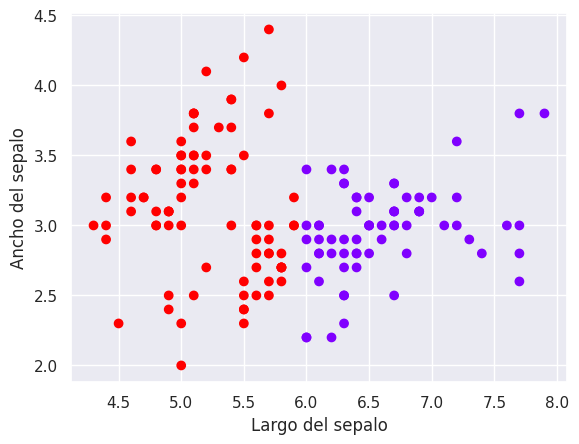

In [11]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=agrup['cluster_pred'],cmap='rainbow')
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

# Estandarizacion de las variables
Ahora estandarizaremos las variables con el metodo de sklearn

In [12]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

Una vez tenemos las variables estandarizadas vamos a agrupar nuevamente, pero esta vez vamos a utilizar el metodo del codo para tratar de encontrar el numero de agrupamientos optimo

In [19]:
wcss = []
for i in range (1,10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)
wcss

[300.0,
 168.39262198361087,
 103.78443895265738,
 79.78313895418404,
 61.730827145295294,
 52.079996282449194,
 44.82457356697236,
 36.671046296958835,
 31.518904911489358]

Text(0, 0.5, 'WCSS')

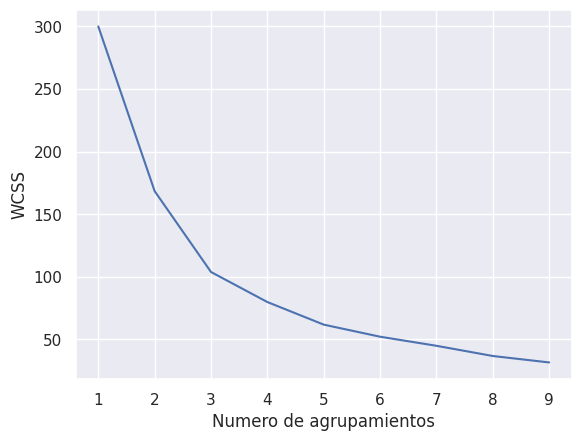

In [20]:
plt.plot(range(1,10),wcss)
plt.xlabel('Numero de agrupamientos')
plt.ylabel('WCSS')

De acuerdo a la grafica, segun el metodo del codo, deberiamos tener de 3 a 5 agrupamientos que nos funcionen correctamente, asi que vamos a probar cada uno de ellos

# 3 Agrupamientos

In [ ]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x)